[Think Stats Chapter 8 Exercise 2](http://greenteapress.com/thinkstats2/html/thinkstats2009.html#toc77) (scoring)

Suppose that you draw a sample with size `n = 10` from an exponential distribution with `lambda = 2`. Simulate this experiment 1000 times and plot the sampling distribution of the estimate `L`. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

This notebook has been converted to a markdown file using [convert_notebooks_to_markdown.py](./convert_notebooks_to_markdown.py).

# Answer

The as the number of samples for each experiment increases, the distribution becomes increasingly narrow and it's mean converges on the correct value of $\lambda$. This is also demonstrated with the decreasing RMSE, and the narrowing of the 90% confidence interval. The plots showing the distribution of the samples and the RMSE support these conclusions.

In [8]:
print(tabulate(fit_statistics,
               headers=fit_statistics.columns.tolist(),
               tablefmt='pipe',
               floatfmt=".3f")
     )

|           |   RMSE |   CI_5th |   CI_95th |
|----------:|-------:|---------:|----------:|
|    10.000 |  0.756 |    1.308 |     3.585 |
|   100.000 |  0.203 |    1.712 |     2.369 |
|  1000.000 |  0.063 |    1.901 |     2.104 |
|  5000.000 |  0.029 |    1.953 |     2.050 |
| 10000.000 |  0.020 |    1.967 |     2.033 |
| 50000.000 |  0.009 |    1.985 |     2.015 |


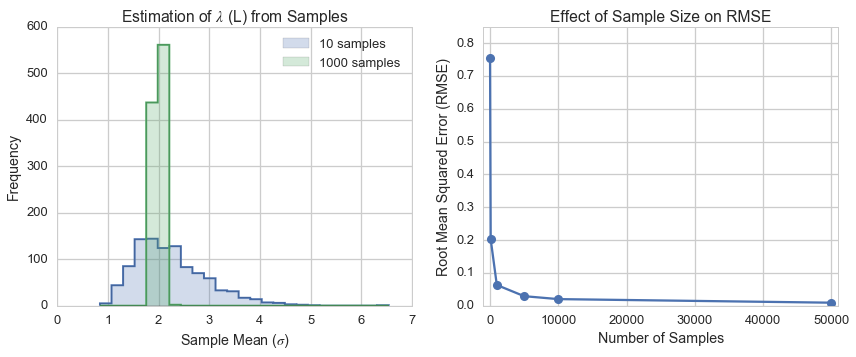

In [9]:
plt.show()

# Code

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from tabulate import tabulate
from load_ThinkStats import load_FemPreg

%matplotlib inline
%config InlineBackend.close_figures = False

Set fixed parameters for the sampling experiment.

In [2]:
np.random.seed(seed=42)

lam = 2.0
n_experiments = 1000

A monkey-patched method to calculate RMSE.

In [3]:
def RMSE(self, lam, axis=0):
    return ((self - lam)
            .pow(2)
            .mean(axis=axis)
            .pipe(np.sqrt))

pd.DataFrame.RMSE = RMSE

## Run sampling experiments

Calculate the estimated value of $\lambda$ (L) for each of the 1000 experiments based on different numbers of samples from the exponential distribution.

In [4]:
# The number of samples to draw
n_list = [10, 100, 1000, 5000, 10000, 50000]

L_calculate = [ ( stats.expon.rvs(scale=1./lam, size=n_experiments*n)
                  .reshape((n_experiments, -1))
                  .mean(axis=1)**(-1)
                ) for n in n_list ]

L_calculate = pd.concat([pd.Series(x) for x in L_calculate], axis=1)
L_calculate.columns = n_list
L_calculate.columns.name = 'Samples'

## Analyze results of sampling experiments
Determine the standard error--I have used RMSE to be consistent with the book. Also calculate the confidence intervals for each of the different sample sizes.

In [5]:
fit_statistics = pd.concat([L_calculate.RMSE(lam), 
                            L_calculate.quantile(0.05), 
                            L_calculate.quantile(0.95)], axis=1)
fit_statistics.columns = ['RMSE', 'CI_5th', 'CI_95th']

In [6]:
print(tabulate(fit_statistics,
               headers=fit_statistics.columns.tolist(),
               tablefmt='pipe',
               floatfmt=".3f")
     )

|           |   RMSE |   CI_5th |   CI_95th |
|----------:|-------:|---------:|----------:|
|    10.000 |  0.756 |    1.308 |     3.585 |
|   100.000 |  0.203 |    1.712 |     2.369 |
|  1000.000 |  0.063 |    1.901 |     2.104 |
|  5000.000 |  0.029 |    1.953 |     2.050 |
| 10000.000 |  0.020 |    1.967 |     2.033 |
| 50000.000 |  0.009 |    1.985 |     2.015 |


## Visualize results
The first plot is the histogram of experiments where 10 samples were taken from the exponential distribution. The second plot is the standard error of the mean, as determined from different numbers of samples.

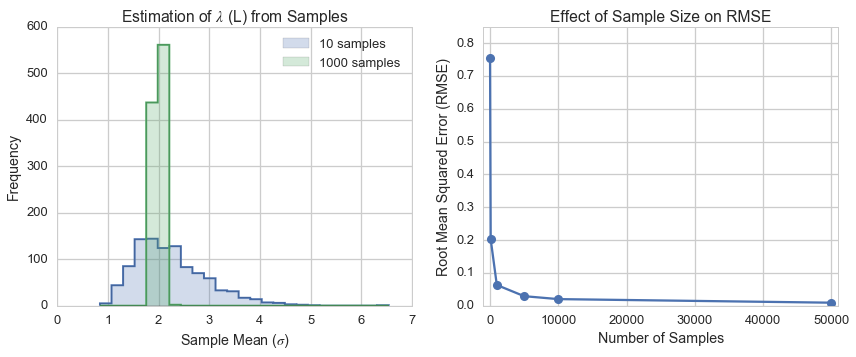

In [7]:
sns.set_context('talk')
sns.set_style('whitegrid')

fig, [ax1, ax2] = plt.subplots(ncols=2)
fig.set_size_inches(14, 5)

colors = sns.palettes.color_palette()

_, bins, _ = ax1.hist(L_calculate[10].values, 
                      bins=25, 
                      histtype='step', 
                      lw=2.0, 
                      color=colors[0])

_ = ax1.hist(L_calculate[10].values, 
             bins=bins, 
             histtype='stepfilled', 
             alpha=0.25, 
             color=colors[0],
             label='10 samples')

_ = ax1.hist(L_calculate[1000].values, 
             bins=bins, 
             histtype='step', 
             lw=2.0, 
             color=colors[1])

_ = ax1.hist(L_calculate[1000].values, 
             bins=bins, 
             histtype='stepfilled', 
             alpha=0.25, 
             color=colors[1],
             label='1000 samples')

_ = ax1.set_ylabel('Frequency')
_ = ax1.set_xlabel('Sample Mean ($\sigma$)')
_ = ax1.set_title('Estimation of $\lambda$ (L) from Samples')
_ = ax1.legend(loc=0)

fit_statistics['RMSE'].plot(marker='o', ax=ax2)
_ = ax2.set_xlabel('Number of Samples')
_ = ax2.set_ylabel('Root Mean Squared Error (RMSE)')
_ = ax2.set_title('Effect of Sample Size on RMSE')
_ = ax2.set_xlim(-1000, fit_statistics.index.max()+1000)
_ = ax2.set_ylim(0.0, 0.85)